In [1]:
%matplotlib inline
import importlib
import nn
importlib.reload(nn)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nn import NeuralNetwork
from sklearn.metrics import accuracy_score, f1_score

In [2]:
data_rings3_train = pd.read_csv("dane_nn4/rings3-regular-training.csv")
X_rings3_train = data_rings3_train[['x', 'y']].values.reshape(-1, 2)
y_rings3_train = data_rings3_train['c'].values.reshape(-1, 1)

data_rings3_test = pd.read_csv("dane_nn4/rings3-regular-test.csv")
X_rings3_test = data_rings3_test[['x', 'y']].values.reshape(-1, 2)
y_rings3_test = data_rings3_test['c'].values.reshape(-1, 1)

data_easy_train = pd.read_csv("dane_nn4/easy-training.csv")
X_easy_train = data_easy_train[['x', 'y']].values.reshape(-1, 2)
y_easy_train = data_easy_train['c'].values.reshape(-1, 1)
y_easy_train = y_easy_train.astype(int)

data_easy_test = pd.read_csv("dane_nn4/easy-test.csv")
X_easy_test = data_easy_test[['x', 'y']].values.reshape(-1, 2)
y_easy_test = data_easy_test['c'].values.reshape(-1, 1)
y_easy_test = y_easy_test.astype(int)

data_xor3_train = pd.read_csv("dane_nn4/xor3-training.csv")
X_xor3_train = data_xor3_train[['x', 'y']].values.reshape(-1, 2)
y_xor3_train = data_xor3_train['c'].values.reshape(-1, 1)
y_xor3_train = y_xor3_train.astype(int)

data_xor3_test = pd.read_csv("dane_nn4/xor3-test.csv")
X_xor3_test = data_xor3_test[['x', 'y']].values.reshape(-1, 2)
y_xor3_test = data_xor3_test['c'].values.reshape(-1, 1)
y_xor3_test = y_xor3_test.astype(int)

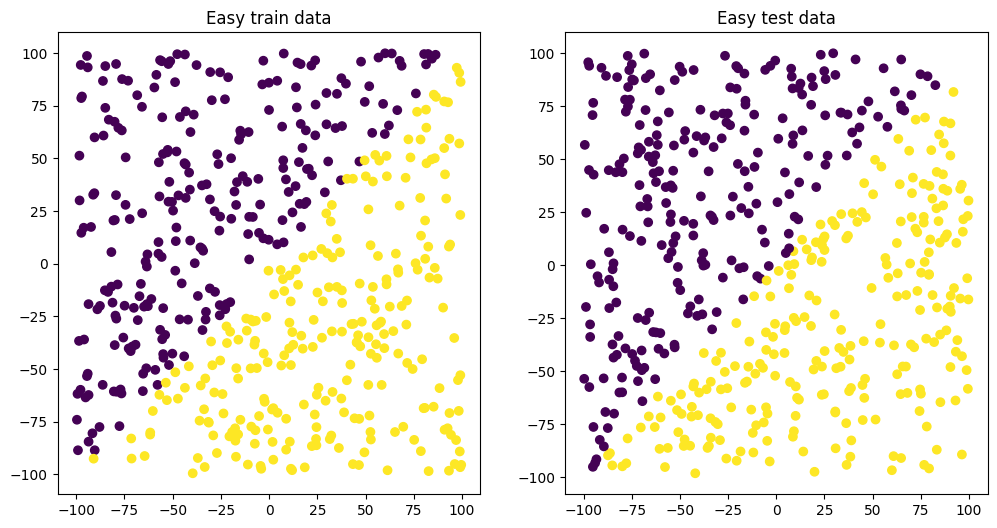

In [38]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X_easy_train[:, 0], X_easy_train[:, 1], c=y_easy_train.ravel(), cmap='viridis')
plt.title("Easy train data")

plt.subplot(1, 2, 2)
plt.scatter(X_easy_test[:, 0], X_easy_test[:, 1], c=y_easy_test.ravel(), cmap='viridis')
plt.title("Easy test data")

plt.show()

In [32]:
input_size = X_easy_train.shape[1]
output_size = np.unique(y_easy_train).shape[0]

nn_easy = NeuralNetwork(X_easy_train, y_easy_train, [input_size, 10, 10, output_size],
                         activation_fun='sigmoid', output_activation='softmax', loss_fun='crossentropy')

nn_easy.train(epochs=int(2e3), learning_rate=0.01, mini_batch=True, batch_size=8,
                             optimization='rmsprop', momentum=0.7, stop_condition=0, report_interval=10)

Starting loss: 1.17


Training:   0%|          | 0/2000 [00:00<?] 


Training complete. Final loss: 0.0000


Accuracy: 1.0000
F1 Score: 1.0000


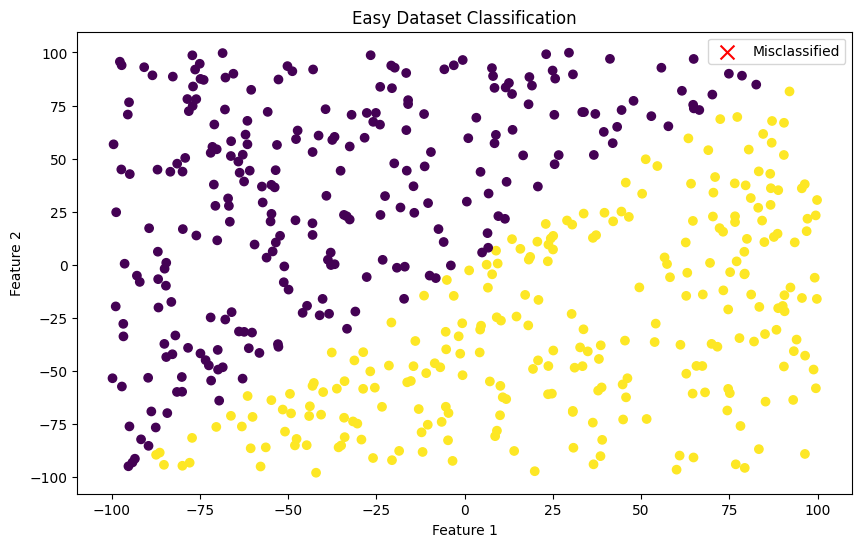

In [33]:
y_easy_pred = nn_easy.predict(X_easy_test)
y_easy_pred = np.argmax(y_easy_pred, axis=1).reshape(-1, 1)

# accuracy
accuracy = accuracy_score(y_easy_test, y_easy_pred)
print(f"Accuracy: {accuracy:.4f}")

# f1 score
f1 = f1_score(y_easy_test, y_easy_pred, average='binary')
print(f"F1 Score: {f1:.4f}")

# Find misclassified points
misclassified = y_easy_pred.ravel() != y_easy_test.ravel()
plt.figure(figsize=(10, 6))
plt.scatter(X_easy_test[~misclassified, 0], X_easy_test[~misclassified, 1], 
            c=y_easy_test[~misclassified].ravel(), cmap='viridis')
plt.scatter(X_easy_test[misclassified, 0], X_easy_test[misclassified, 1], 
            color='red', marker='x', s=100, 
            label='Misclassified')
plt.title('Easy Dataset Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## Rings 3 reglar dataset

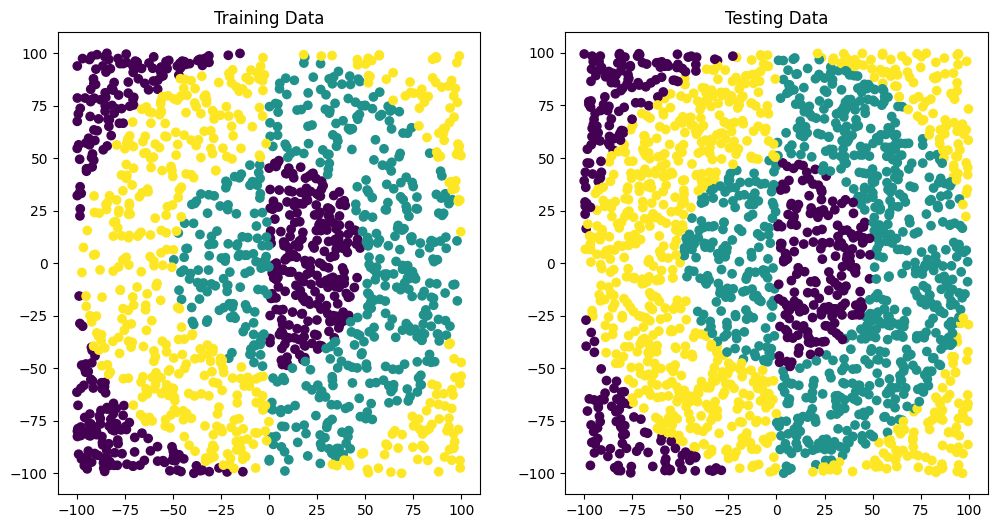

In [37]:
plt.figure(figsize=(12, 6))

# Plot training data
plt.subplot(1, 2, 1)
plt.scatter(X_rings3_train[:, 0], X_rings3_train[:, 1], c=y_rings3_train.ravel(), cmap='viridis')
plt.title('Training Data')

# Plot testing data
plt.subplot(1, 2, 2)
plt.scatter(X_rings3_test[:, 0], X_rings3_test[:, 1], c=y_rings3_test.ravel(), cmap='viridis')
plt.title('Testing Data')

plt.show()

In [53]:
input_size = X_rings3_train.shape[1]
output_size = np.unique(y_rings3_train).shape[0]
nn_rings3 = NeuralNetwork(X_rings3_train, y_rings3_train, 
                   [input_size, 50, 50, output_size],
                   activation_fun='sigmoid', 
                   output_activation='softmax',   
                   loss_fun='crossentropy')

nn_rings3.train(learning_rate=0.01, epochs=int(500), validation_data=(X_rings3_test, y_rings3_test),
                        optimization='rmsprop', momentum=0, stop_condition=0.01, report_interval=10)
nn_rings3.train(learning_rate=0.001, epochs=int(3500), validation_data=(X_rings3_test, y_rings3_test), mini_batch=True, batch_size=32,
                        optimization='rmsprop', momentum=0, stop_condition=0.01, report_interval=10)
nn_rings3.train(learning_rate=0.0005, epochs=int(1000), validation_data=(X_rings3_test, y_rings3_test), mini_batch=True, batch_size=32,
                        optimization='rmsprop', momentum=0, stop_condition=0.01, report_interval=10)


Starting loss: 1.42


Training:   0%|          | 0/500 [00:00<?] 


Training complete. Final loss: 0.4254
Starting loss: 0.47


Training:   0%|          | 0/3500 [00:00<?] 


Training complete. Final loss: 0.1016
Starting loss: 0.13


Training:   0%|          | 0/1000 [00:00<?] 


Training complete. Final loss: 0.1016


Accuracy: 0.9695
F1 Score: 0.9695


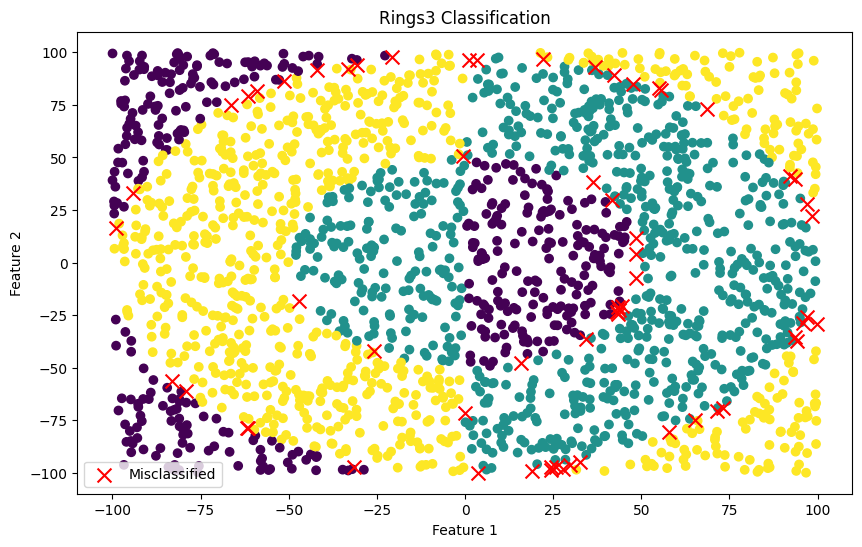

In [54]:
y_pred_rings3 = nn_rings3.predict(X_rings3_test)
y_pred_rings3 = np.argmax(y_pred_rings3, axis=1)

accuracy = accuracy_score(y_rings3_test, y_pred_rings3)
print(f'Accuracy: {accuracy:.4f}')
f1 = f1_score(y_rings3_test, y_pred_rings3, average='weighted')
print(f'F1 Score: {f1:.4f}')

# Find misclassified points
misclassified = y_pred_rings3 != y_rings3_test.ravel()

plt.figure(figsize=(10, 6))

# Plot correctly classified points
plt.scatter(X_rings3_test[~misclassified, 0], X_rings3_test[~misclassified, 1], 
            c=y_rings3_test[~misclassified].ravel(), cmap='viridis')

# Plot misclassified points in red
plt.scatter(X_rings3_test[misclassified, 0], X_rings3_test[misclassified, 1], 
            color='red', marker='x', s=100, 
            label='Misclassified')

plt.title('Rings3 Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

## Xor3 dataset

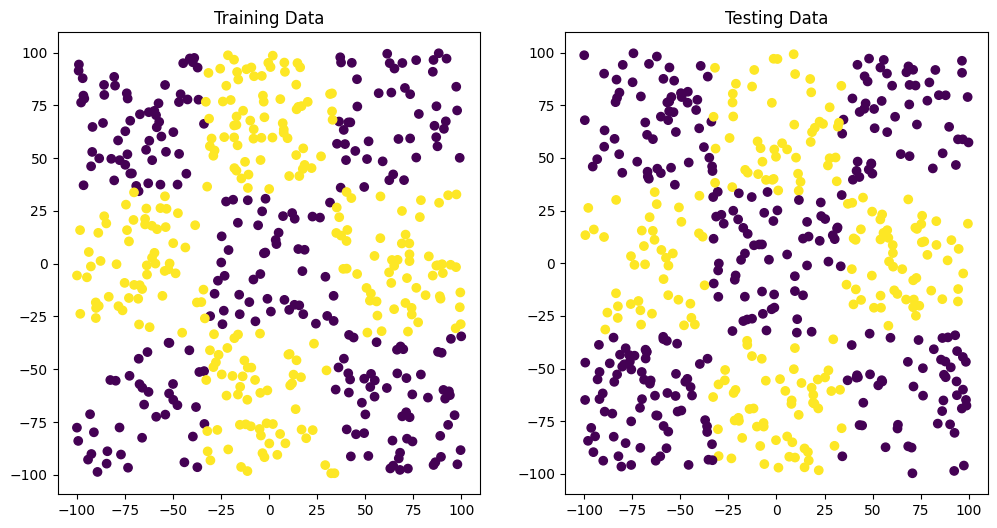

In [55]:
plt.figure(figsize=(12, 6))

# Plot training data
plt.subplot(1, 2, 1)
plt.scatter(X_xor3_train[:, 0], X_xor3_train[:, 1], c=y_xor3_train.ravel(), cmap='viridis')
plt.title('Training Data')

# Plot testing data
plt.subplot(1, 2, 2)
plt.scatter(X_xor3_test[:, 0], X_xor3_test[:, 1], c=y_xor3_test.ravel(), cmap='viridis')
plt.title('Testing Data')

plt.show()  

In [66]:
input_size = X_xor3_train.shape[1]
output_size = np.unique(y_xor3_train).shape[0]

nn_xor3 = NeuralNetwork(X_xor3_train, y_xor3_train, [input_size, 32, 32, output_size],
                         activation_fun='sigmoid', output_activation='softmax', loss_fun='crossentropy')

nn_xor3.train(learning_rate=0.01, epochs=int(1e3), validation_data=(X_xor3_test, y_xor3_test), mini_batch=True, batch_size=4,
                        optimization='rmsprop', momentum=0.7, stop_condition=0.01, report_interval=10)
nn_xor3.train(learning_rate=0.001, epochs=int(1e3), validation_data=(X_xor3_test, y_xor3_test), mini_batch=True, batch_size=4,
                        optimization='rmsprop', momentum=0.7, stop_condition=0.01, report_interval=10)
nn_xor3.train(learning_rate=0.0005, epochs=int(1e3), validation_data=(X_xor3_test, y_xor3_test), mini_batch=True, batch_size=4,
                        optimization='rmsprop', momentum=0.7, stop_condition=0.01, report_interval=10)

Starting loss: 0.77


Training:   0%|          | 0/1000 [00:00<?] 


Training complete. Final loss: 0.0932
Starting loss: 0.09


Training:   0%|          | 0/1000 [00:00<?] 


Training complete. Final loss: 0.0657
Starting loss: 0.00


Training:   0%|          | 0/1000 [00:00<?] 


Training complete. Final loss: 0.0655


Accuracy: 0.9780
F1 Score: 0.9736


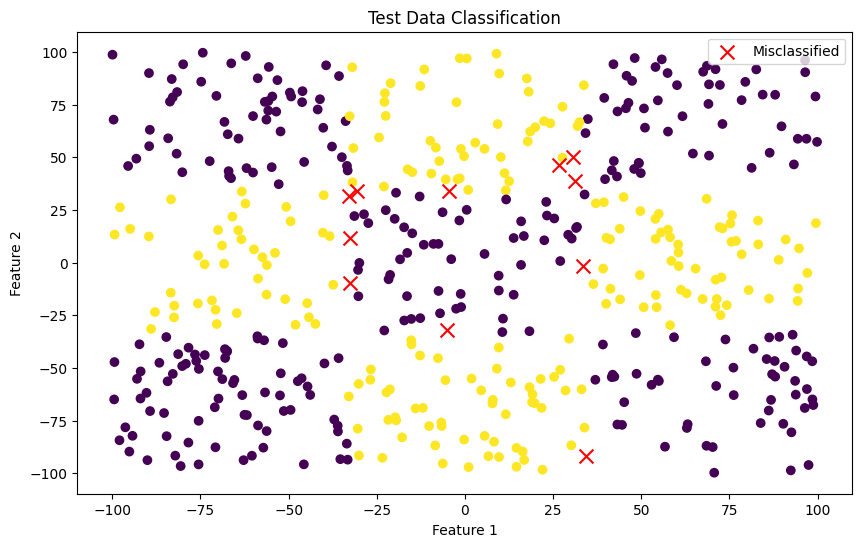

In [67]:
y_xor3_pred = nn_xor3.predict(X_xor3_test) 
y_xor3_pred = np.argmax(y_xor3_pred, axis=1).reshape(-1, 1)

accuracy = accuracy_score(y_xor3_test, y_xor3_pred)
print(f'Accuracy: {accuracy:.4f}')
f1 = f1_score(y_xor3_test, y_xor3_pred, average='binary')
print(f'F1 Score: {f1:.4f}')

misclassified = y_xor3_pred.ravel() != y_xor3_test.ravel()

plt.figure(figsize=(10, 6))

plt.scatter(X_xor3_test[~misclassified, 0], X_xor3_test[~misclassified, 1], 
            c=y_xor3_test[~misclassified].ravel(), cmap='viridis')
plt.scatter(X_xor3_test[misclassified, 0], X_xor3_test[misclassified, 1], 
            color='red', marker='x', s=100, 
            label='Misclassified')

plt.title('Test Data Classification')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()